<a href="https://colab.research.google.com/github/yasminbv/DataScience/blob/main/Homework4-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [22]:
X=diabetes['data']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [23]:
y=diabetes['target']
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [24]:
def evalmetric(y,ypred):
 from scipy.stats import pearsonr
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 crl, _ = pearsonr(y, ypred)
 r2_f = crl*crl
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", round(r2_f, 4))


In [18]:
#Note: You can use ChatGPT or notebooks used in the class to find the answers to the questions
#1.Get the correlation between X variables and y variables.(5 pt)
X.corrwith(y)

age    0.187889
sex    0.043062
bmi    0.586450
bp     0.441482
s1     0.212022
s2     0.174054
s3    -0.394789
s4     0.430453
s5     0.565883
s6     0.382483
dtype: float64

In [25]:
#2.Split the data into train and test using %25 percent of data(5 pt)
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 10)
(331,)
(111, 10)
(111,)


In [26]:
#3 Using Decision Tree and Random Forecast, get the evaluation scores on test and training data?
#Pick one of the metric such as MAPE and 
#explain briefly why decision tree perform better in training data although it performs worse on test data (15 pt)

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, y_train)
dt_pred_train=dt.predict(X_train)
dt_pred_test=dt.predict(X_test)

from sklearn.metrics import accuracy_score
print('Decision Tree')
print(accuracy_score(y_train, dt_pred_train))
print(accuracy_score(y_test, dt_pred_test))

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)
rfc_pred_train=rfc.predict(X_train)
rfc_pred_test=rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print('Random Forecast')
print(accuracy_score(y_train, dt_pred_train))
print(accuracy_score(y_test, dt_pred_test))

Decision Tree
1.0
0.009009009009009009
Random Forecast
1.0
0.009009009009009009


Decision tree can potentially create highly complex and overfitted models that fit the training data very closely. This can result in a high accuracy score on the training data, but not on test data, which is considered as unseen. When the same decision tree is applied to a test dataset, it may perform worse because the model is too specific to the training data and cannot capture the true underlying patterns and relationships in the data, called overfitting.

In [34]:
#4 Use boosting methods (XGBoost, LightGBM, GradingBoosting Method and CatBoost) to get
# the evaluation scores on test and training data
#Which methods gave  best performance of Boosting technqie on test data based on MAPE metric?
#With this method, Did you get better result from Random Forest on test data based on MAPE metric?(25 pt)
from xgboost import XGBClassifier
model = XGBClassifier(random_state=17)
model.fit(X_train, y_train)
xgb_pred = model.predict(X_test)
print('XGBoost')
print(accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred)) 
sum(y_test)

import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=17)
lgb_model.fit(X_train, y_train)
print('LightGBM')
print(accuracy_score(y_test, lgb_model.predict(X_test)))
print(confusion_matrix(y_test, lgb_model.predict(X_test))) 

from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=17)
gbm_model.fit(X_train, y_train)
print('GradingBoosting Method')
print(accuracy_score(y_test, gbm_model.predict(X_test)))
print(confusion_matrix(y_test, gbm_model.predict(X_test)))

import catboost as cb
cab = cb.CatBoostClassifier(random_state=17)
cab.fit(X_train, y_train)
print('CatBoost')
print(accuracy_score(y_test, cab.predict(X_test)))
print(confusion_matrix(y_test,cab.predict(X_test)))

The best performance showed Grading Boosting method, then XGBoost, LightGBM, and lastly CatBoost. Boosting produced more accurate predictions than random forest, usually because when the data is noisy or there are many interactions among the predictor variables.

In [31]:
#for the other question use following data. Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

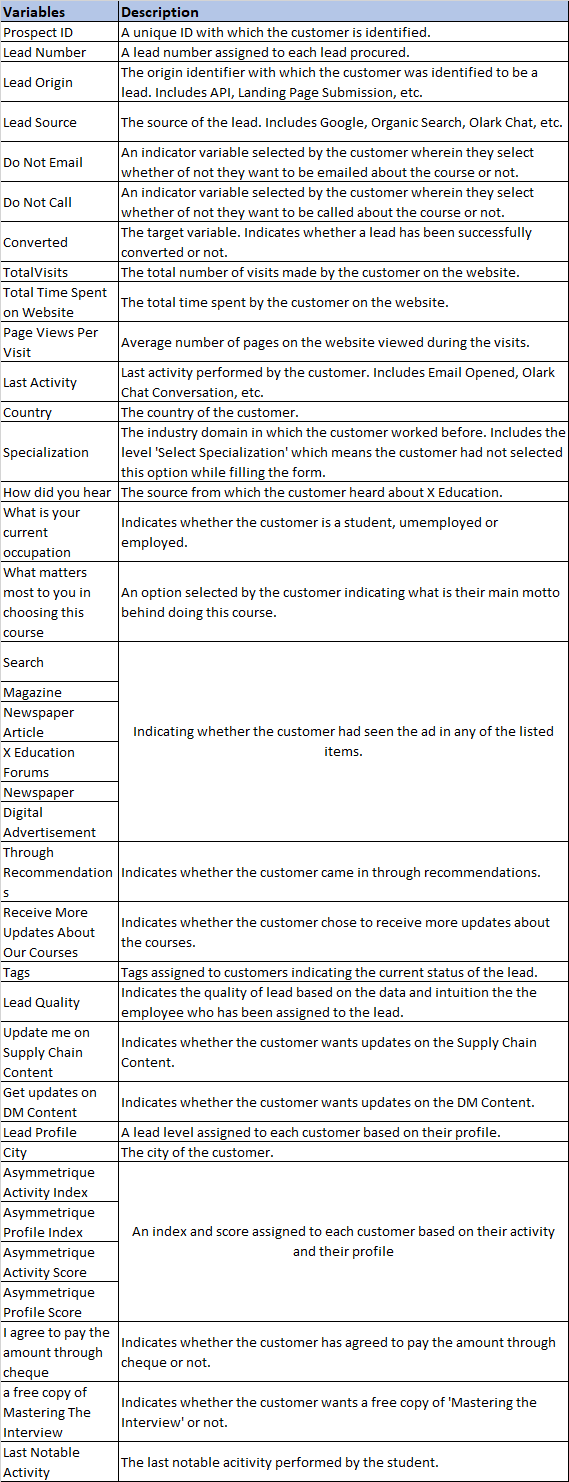

In [ ]:
#Q5 (10 pt) There are missing values in the Lead data .
# Replace missing variables with the mean  if variable is numeric or mode if variable is categorical.

cols_with_missing_values = df.columns[df.isnull().any()]

for col in cols_with_missing_values:
    if df[col].dtype == 'object':
        
        mode = df[col].mode()[0]
        df[col].fillna(mode, inplace=True)
    else:
        
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)

In [20]:
#Q6-(10 pt)Convert categorical variables to numerical with label encoder method .
#Drop Prospect ID	Lead Number from the variables and use converted as target variables.
#Split data into train and test using 30% of the data 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include=['object']):
    df[col] = le.fit_transform(df[col].astype(str))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Converted', axis=1), df['Converted'], test_size=0.3, random_state=42)


In [33]:
#Q7(30 pt)Use decison tree, random forest andboosting methods (XGBoost, LightGBM, GradingBoosting Method) to get
# the accuracy scores on test  data
#Which methods gave  best performance on test data based on accuracy metric?
from xgboost import XGBClassifier
model = XGBClassifier(random_state=17)
model.fit(X_train, y_train)
xgb_pred = model.predict(X_test)
print('XGBoost')
print(accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred)) 
sum(y_test)

import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=17)
lgb_model.fit(X_train, y_train)
print('LightGBM')
print(accuracy_score(y_test, lgb_model.predict(X_test)))
print(confusion_matrix(y_test, lgb_model.predict(X_test))) 

from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=17)
gbm_model.fit(X_train, y_train)
print('GradingBoosting Method')
print(accuracy_score(y_test, gbm_model.predict(X_test)))
print(confusion_matrix(y_test, gbm_model.predict(X_test)))

import catboost as cb
cab = cb.CatBoostClassifier(random_state=17)
cab.fit(X_train, y_train)
print('CatBoost')
print(accuracy_score(y_test, cab.predict(X_test)))
print(confusion_matrix(y_test,cab.predict(X_test)))

The best performance showed Grading Boosting method, then XGBoost, LightGBM, and lastly CatBoost.